# MCMC and Gibbs Sampling

In this assignment we will learn how to use library for probabilistic programming and inference PyMC3.

### Installation
New libraries that are required for this tasks can be installed with the following command (if you use Anaconda):

```bash
pip install pymc3 
```

You can also install pymc3 from source using the instruction.


Also we will need `matplotlib` and `seaborn` libraries in this task.

In [1]:
! conda install pyqt=4 --y

/bin/sh: conda: command not found


In [2]:
! pip3 install pymc3

In [4]:
import numpy as np
import pandas as pd
import numpy.random as rnd
import seaborn as sns
import pymc3 as pm
from grader import Grader
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Grading
We will create a grader instace below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [5]:
grader = Grader()

## Task 1. Alice and Bob

Alice and Bob are trading on the market. Both of them are selling the Thing and want to get as high profit as possible.
Every hour they check out with each other's prices and adjust their prices to compete on the market. Although they have different strategies for price setting.

**Alice**: take Bob's price during previous hour, multiply by 0.6, add 90\$, add Gaussian noise from $N(0, 20^2)$.

**Bob**: take Alice's price during previous hour, multiply by 1.2 and add substract 20\$, add Gaussian noise from $N(0, 10^2)$.

In the end of every hour Alice pick the new price first.

The problem is to find the distribution of Alice and Bob's prices after many hours of such an experiment.

### Task 1.1

Implement the `run_simulation` function accoridng to the description above. 

In [116]:
def run_simulation(alice_start_price=300.0, bob_start_price=300.0, seed=42, num_hours=10000, burnin=1000):
    """
    Simulates an evolution of prices set by Bob and Alice.
    Please don't change the signature of the function.
    """
    np.random.seed(seed)

    alice_prices = [alice_start_price]
    bob_prices = [bob_start_price]

    ### YOUR CODE HERE ###
    for h in range(num_hours):
        alice_price = bob_prices[-1]*0.6+90+np.random.normal(0, 20)
        bob_price = alice_price*1.2-20+np.random.normal(0, 10)
        alice_prices.append(alice_price)
        bob_prices.append(bob_price)
    return alice_prices[burnin:], bob_prices[burnin:]

In [118]:
alice_prices, bob_prices = run_simulation(alice_start_price=300, bob_start_price=300, seed=42, num_hours=3, burnin=1)
grader.submit_simulation_trajectory(alice_prices, bob_prices)

Current answer for task 1.1 (Alice trajectory) is: 279.93428306022463  291.67686875834846
Current answer for task 1.1 (Bob trajectory) is: 314.5384966605577  345.2425410740984


### Task 1.2
What is the average prices for Alice and Bob after the burnin period? Whose prices are higher?

In [124]:
### YOUR CODE HERE
alice_prices, bob_prices = run_simulation()
average_alice_price = sum(alice_prices)/len(alice_prices)
average_bob_price = sum(bob_prices)/len(bob_prices)
grader.submit_simulation_mean(average_alice_price, average_bob_price)

Current answer for task 1.2 (Alice mean) is: 278.628212955
Current answer for task 1.2 (Bob mean) is: 314.376422877


### Task 1.3

Let's look at the 2-d histogram of prices, computed using kernel density estimation.

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'figsize'
  s)


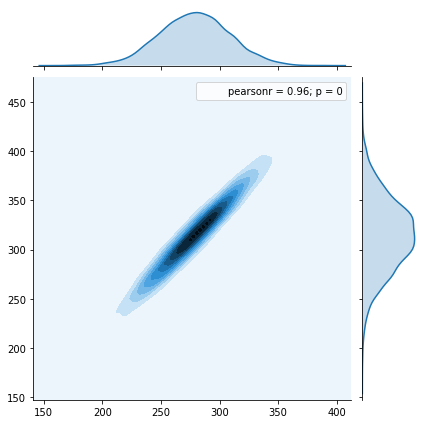

In [127]:
data = np.array(run_simulation())
sns.jointplot(data[0, :], data[1, :], kind='kde', figsize=(12, 6))

Clearly the prices of Bob and Alce are highly correlated. What is the Pearson correlation coefficient of Alice and Bob prices?

In [129]:
correlation = np.corrcoef(alice_prices, bob_prices)[0][1]
grader.submit_simulation_correlation(correlation)

Current answer for task 1.3 is: 0.963634002516


### Task 1.4

We observe an interesting effect here: seems like the bivariate distribution of Alice and Bob prices converges to a correlated bivariate gaussian distribution.

Let's check, whether the result change if we use different random seed and starting points.

In [132]:
# Pick different starting prices, e.g 10, 1000, 10000 for Bob and Alice. 
# Does the joint distribution of the two prices depend on these parameters?
POSSIBLE_ANSWERS = {
 0: 'Depends on random seed and starting prices', 
 1: 'Depends only on random seed',
 2: 'Depends only on starting prices',
 3: 'Does not depend on random seed and starting prices'
}

idx = 3
answer = POSSIBLE_ANSWERS[idx]
grader.submit_simulation_depends(answer)

Current answer for task 1.4 is: Does not depend on random seed and starting prices


## Task 2. Bayesian linear regression with PyMC3

L1-regularized linear regression is a really powerful model that allows us to thain the model and perform feature selection at the same time.

However, Laplace and Gaussian distributions are not conjugate and we can not perform Bayesian inference in this model analytically. Great way to overcome this is our silver bullet: MCMC algorithm.

### Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate token on this programming assignment page. Note: Token expires 30 minutes after generation.

In [133]:
STUDENT_EMAIL = ""
STUDENT_TOKEN = ""
grader.status()

You want to submit these numbers:
Task 1.1 (Alice trajectory): 279.93428306022463  291.67686875834846
Task 1.1 (Bob trajectory): 314.5384966605577  345.2425410740984
Task 1.2 (Alice mean): 278.628212955
Task 1.2 (Bob mean): 314.376422877
Task 1.3: 0.963634002516
Task 1.4: Does not depend on random seed and starting prices


If you want to submit these answers, run cell below

In [134]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!
